In [1]:
import model
import matplotlib.pyplot as plt
import numpy as np
import brian2

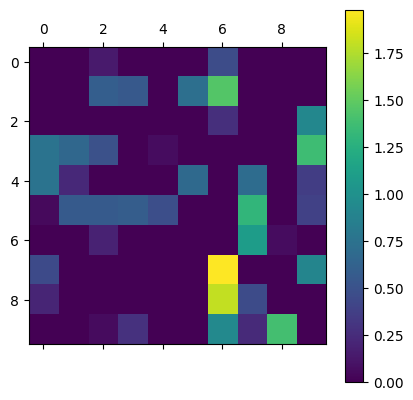

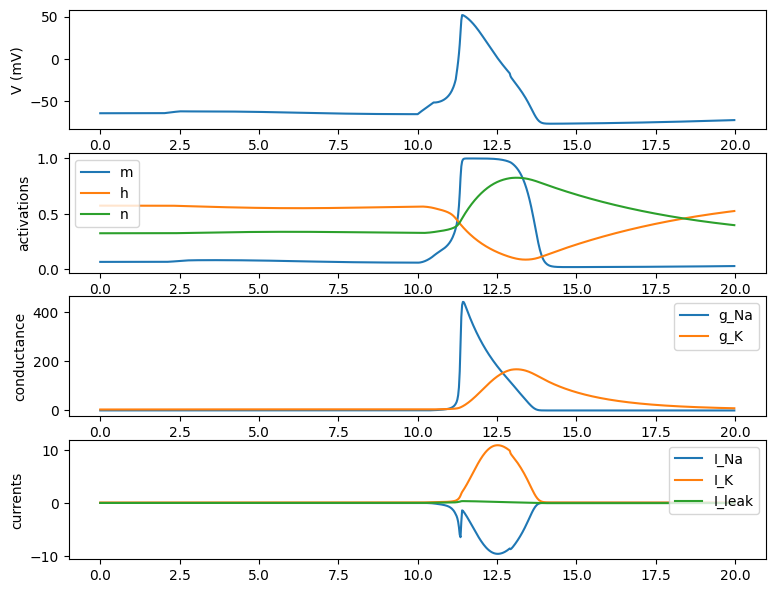

In [2]:
net = model.Model(10, 0.6, pEE=0.6, wEE=1, pEI=0.2, wEI=0.5, pIE=0.4, wIE=1.5, pII=0.8, wII=2)

plt.matshow(net.mat)
plt.colorbar()
plt.show()

